# Apriori with mlxtend.frequent_patterns

Import Library

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

Mengolah Data

In [ ]:
data = pd.read_excel("dataset_tb.xlsx")
data

,ID Transaksi,Tanggal,Transaksi,Kategori,Jumlah,Jumlah_pembulatan
0,3474/KSR/UTM/0822,2022-09-01,Paku Rivet 450,paku,1.0,1
1,3474/KSR/UTM/0822,2022-09-01,Fisher Imundex S8,fisher,1.0,1
2,3474/KSR/UTM/0822,2022-09-01,Skrup F+AB 8x2,skrup,1.0,1
3,3476/KSR/UTM/0822,2022-09-01,NUSA 14 ( 1500 X 1020 X 4 ),asbes,1.0,1
4,3476/KSR/UTM/0822,2022-09-01,Kanolite Gelb 150x90 Putih,kanolite,1.0,1
...,...,...,...,...,...,...
5895,3297/KSR/UTM/0922,2022-09-30,Djabesman 06 225,asbes,8.0,8
5896,3299/KSR/UTM/0922,2022-09-30,Baut Hitam 19mm 20cm,baut,4.0,4
5897,3299/KSR/UTM/0922,2022-09-30,Ring Plat 10,ring plat,1.0,1
5898,3301/KSR/UTM/0922,2022-09-30,"Overval Plat 2""",overval,1.0,1


In [ ]:
data.columns

Index(['ID Transaksi', 'Tanggal', 'Transaksi', 'Kategori', 'Jumlah',
       'Jumlah_pembulatan'],
      dtype='object')

In [ ]:
data['ID Transaksi'].nunique()

1721

In [ ]:
data['Transaksi'].nunique()

1490

In [ ]:
data['Kategori'].nunique()

285

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5900 entries, 0 to 5899
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID Transaksi       5900 non-null   object        
 1   Tanggal            5900 non-null   datetime64[ns]
 2   Transaksi          5900 non-null   object        
 3   Kategori           5900 non-null   object        
 4   Jumlah             5900 non-null   float64       
 5   Jumlah_pembulatan  5900 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 276.7+ KB


In [ ]:
data.describe()

,Jumlah,Jumlah_pembulatan
count,5900.000000,5900.000000
mean,4.415812,4.431864
std,18.767915,18.768581
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,3.000000,3.000000
max,600.000000,600.000000


In [ ]:
# Mengecek apakah dataframe ada nilai kosong atau "NaN"
data.isnull().values.any()

False

In [ ]:
data.isnull().sum()

ID Transaksi         0
Tanggal              0
Transaksi            0
Kategori             0
Jumlah               0
Jumlah_pembulatan    0
dtype: int64

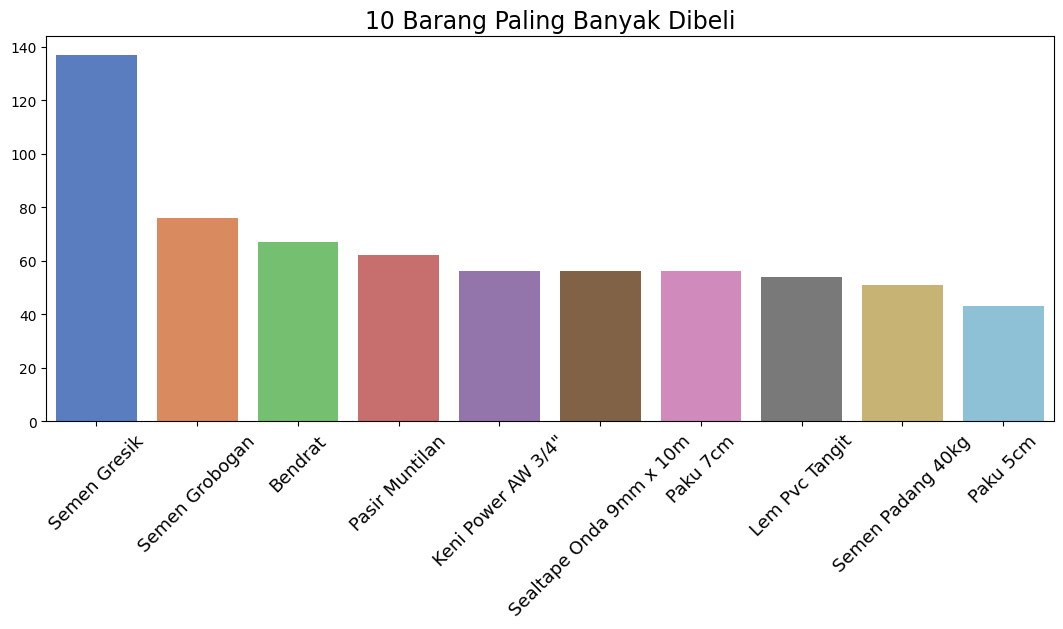

In [ ]:
# import matplotlib.pyplot as plt # together with Seaborn to visualize data
# import seaborn as sns

plt.figure(figsize=(13,5))
sns.set_palette("muted")

sns.barplot(x = data["Transaksi"].value_counts()[:10].index, y = data["Transaksi"].value_counts()[:10].values)
plt.xlabel(""); plt.ylabel("")
plt.xticks(size = 13, rotation = 45)
plt.title('10 Barang Paling Banyak Dibeli', size = 17)
plt.show()

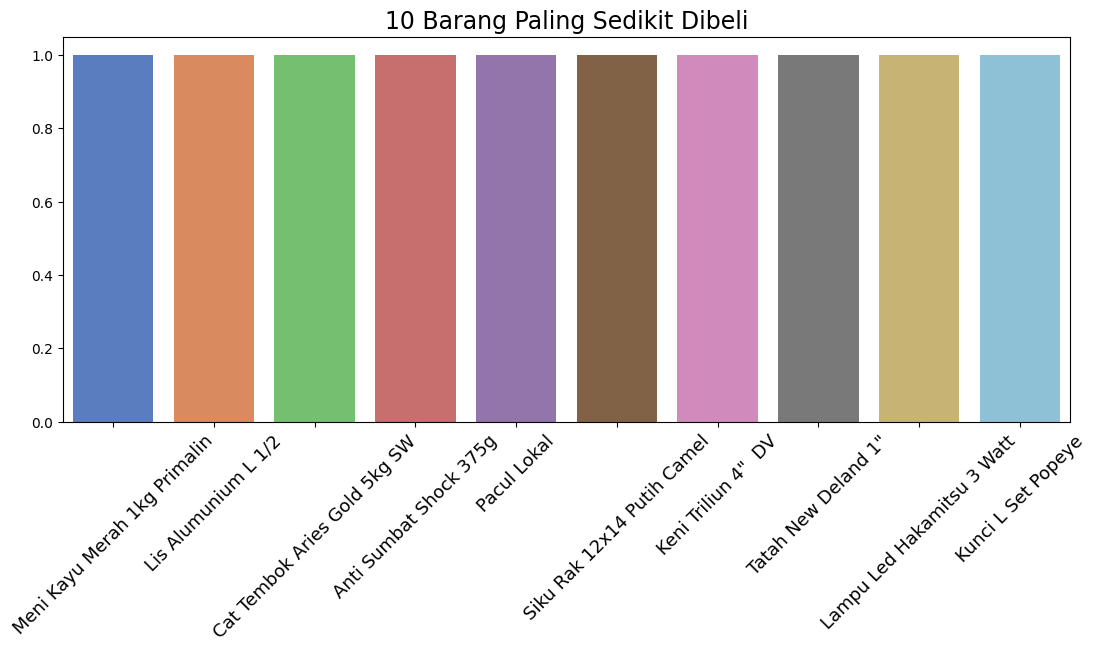

In [ ]:
plt.figure(figsize=(13,5))
sns.set_palette("muted")

sns.barplot(x = data["Transaksi"].value_counts()[-30:-20].index, y = data["Transaksi"].value_counts()[-30:-20].values)
plt.xlabel(""); plt.ylabel("")
plt.xticks(size = 13, rotation = 45)
plt.title('10 Barang Paling Sedikit Dibeli', size = 17)
plt.show()

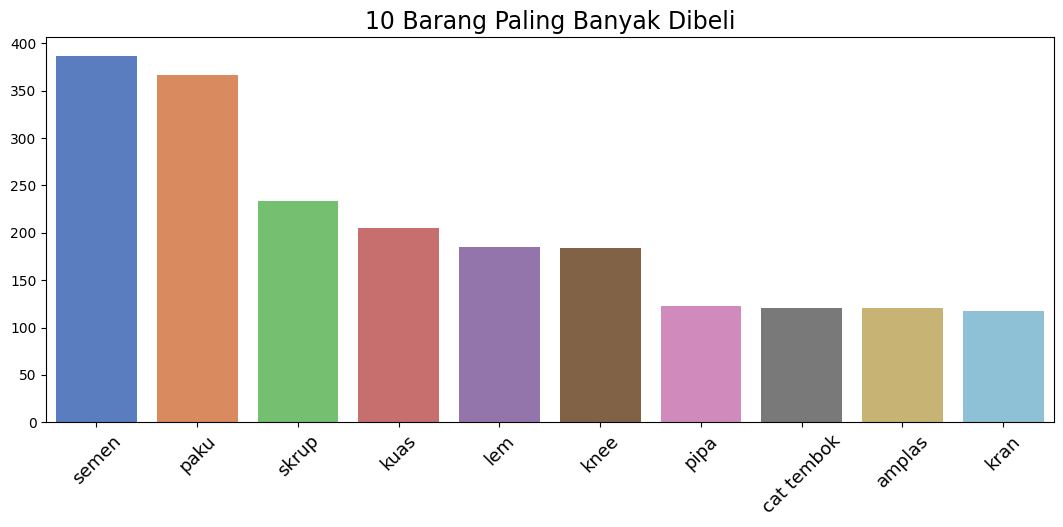

In [ ]:
plt.figure(figsize=(13,5))
sns.set_palette("muted")

sns.barplot(x = data["Kategori"].value_counts()[:10].index, y = data["Kategori"].value_counts()[:10].values)
plt.xlabel(""); plt.ylabel("")
plt.xticks(size = 13, rotation = 45)
plt.title('10 Barang Paling Banyak Dibeli', size = 17)
plt.show()

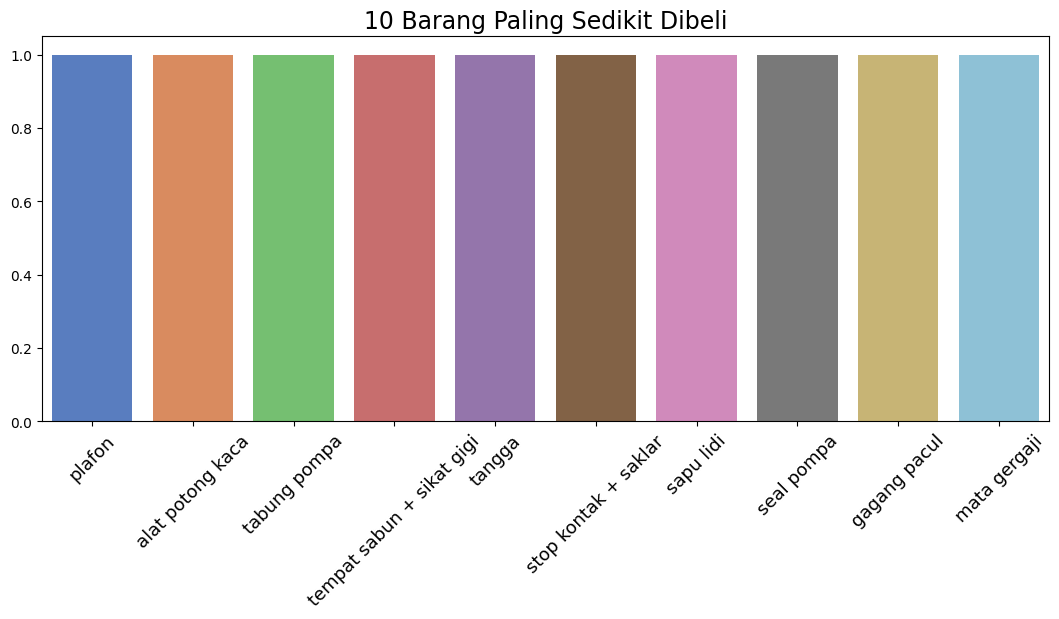

In [ ]:
plt.figure(figsize=(13,5))
sns.set_palette("muted")

sns.barplot(x = data["Kategori"].value_counts()[-10:].index, y = data["Kategori"].value_counts()[-10:].values)
plt.xlabel(""); plt.ylabel("")
plt.xticks(size = 13, rotation = 45)
plt.title('10 Barang Paling Sedikit Dibeli', size = 17)
plt.show()

In [ ]:
data["Kategori"].value_counts()[:10]

semen         387
paku          366
skrup         233
kuas          205
lem           185
knee          184
pipa          123
cat tembok    121
amplas        121
kran          117
Name: Kategori, dtype: int64

In [ ]:
data["hari"] = data['Tanggal'].dt.weekday
data["tgl"] = data['Tanggal'].dt.day
data

,ID Transaksi,Tanggal,Transaksi,Kategori,Jumlah,Jumlah_pembulatan,hari,tgl
0,3474/KSR/UTM/0822,2022-09-01,Paku Rivet 450,paku,1.0,1,3,1
1,3474/KSR/UTM/0822,2022-09-01,Fisher Imundex S8,fisher,1.0,1,3,1
2,3474/KSR/UTM/0822,2022-09-01,Skrup F+AB 8x2,skrup,1.0,1,3,1
3,3476/KSR/UTM/0822,2022-09-01,NUSA 14 ( 1500 X 1020 X 4 ),asbes,1.0,1,3,1
4,3476/KSR/UTM/0822,2022-09-01,Kanolite Gelb 150x90 Putih,kanolite,1.0,1,3,1
...,...,...,...,...,...,...,...,...
5895,3297/KSR/UTM/0922,2022-09-30,Djabesman 06 225,asbes,8.0,8,4,30
5896,3299/KSR/UTM/0922,2022-09-30,Baut Hitam 19mm 20cm,baut,4.0,4,4,30
5897,3299/KSR/UTM/0922,2022-09-30,Ring Plat 10,ring plat,1.0,1,4,30
5898,3301/KSR/UTM/0922,2022-09-30,"Overval Plat 2""",overval,1.0,1,4,30


In [ ]:
data_perday = data.groupby('hari')['ID Transaksi'].count()
data_perday

hari
0     844
1     740
2     669
3    1061
4     951
5     806
6     829
Name: ID Transaksi, dtype: int64

Text(0.5, 1.0, 'Total Transaksi Per Hari')

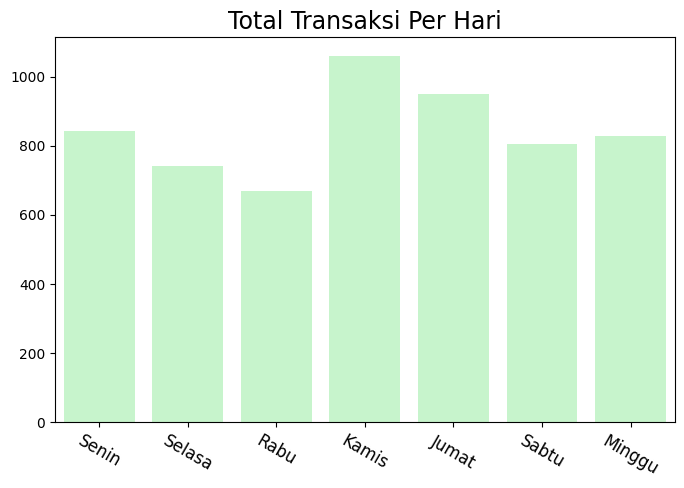

In [ ]:
plt.figure(figsize = (8,5))
sns.barplot(
    x = ["Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu", "Minggu"],
    y = data_perday.values, color = "#BFFCC6")
plt.xticks(size = 12, rotation = -30)
plt.title("Total Transaksi Per Hari", size = 17)

In [ ]:
data_pertgl = data.groupby("tgl")["ID Transaksi"].count()
data_pertgl

tgl
1     172
2     196
3     202
4     210
5     225
6     197
7     159
8     268
9     217
10    157
11    221
12    163
13    162
14    163
15    158
16    186
17    223
18    168
19    242
20    183
21    203
22    225
23    163
24    224
25    230
26    214
27    198
28    144
29    238
30    189
Name: ID Transaksi, dtype: int64

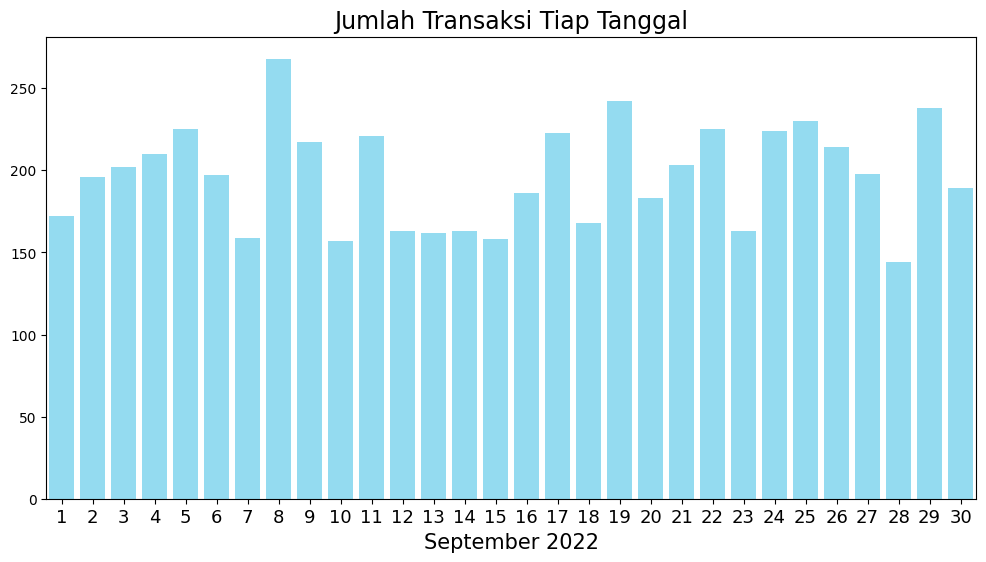

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x = data_pertgl.index, y = data_pertgl.values, color = "#85E3FF")
plt.xlabel('September 2022', size = 15)
plt.title('Jumlah Transaksi Tiap Tanggal', size = 17)
plt.xticks(size = 13)
plt.show()

In [ ]:
#ALL
# Stripping extra spaces in the description
data['Transaksi'] = data['Transaksi'].str.strip()

# Dropping the rows without any invoice number
data.dropna(axis = 0, subset =['ID Transaksi'], inplace = True)
data['ID Transaksi'] = data['ID Transaksi'].astype('str')

# Dropping all transactions which were done on credit
data = data[~data['ID Transaksi'].str.contains('C')]

In [ ]:
data

,ID Transaksi,Tanggal,Transaksi,Kategori,Jumlah,Jumlah_pembulatan
0,3474/KSR/UTM/0822,2022-09-01,Paku Rivet 450,paku,1.0,1
1,3474/KSR/UTM/0822,2022-09-01,Fisher Imundex S8,fisher,1.0,1
2,3474/KSR/UTM/0822,2022-09-01,Skrup F+AB 8x2,skrup,1.0,1
3,3476/KSR/UTM/0822,2022-09-01,NUSA 14 ( 1500 X 1020 X 4 ),asbes,1.0,1
4,3476/KSR/UTM/0822,2022-09-01,Kanolite Gelb 150x90 Putih,kanolite,1.0,1
...,...,...,...,...,...,...
5895,3297/KSR/UTM/0922,2022-09-30,Djabesman 06 225,asbes,8.0,8
5896,3299/KSR/UTM/0922,2022-09-30,Baut Hitam 19mm 20cm,baut,4.0,4
5897,3299/KSR/UTM/0922,2022-09-30,Ring Plat 10,ring plat,1.0,1
5898,3301/KSR/UTM/0922,2022-09-30,"Overval Plat 2""",overval,1.0,1


In [ ]:
#CATEGORY
# Stripping extra spaces in the description
data['Kategori'] = data['Kategori'].str.strip()

# Dropping the rows without any invoice number
data.dropna(axis = 0, subset =['ID Transaksi'], inplace = True)
data['ID Transaksi'] = data['ID Transaksi'].astype('str')

In [ ]:
data

,ID Transaksi,Tanggal,Transaksi,Kategori,Jumlah,Jumlah_pembulatan
0,3474/KSR/UTM/0822,2022-09-01,Paku Rivet 450,paku,1.0,1
1,3474/KSR/UTM/0822,2022-09-01,Fisher Imundex S8,fisher,1.0,1
2,3474/KSR/UTM/0822,2022-09-01,Skrup F+AB 8x2,skrup,1.0,1
3,3476/KSR/UTM/0822,2022-09-01,NUSA 14 ( 1500 X 1020 X 4 ),asbes,1.0,1
4,3476/KSR/UTM/0822,2022-09-01,Kanolite Gelb 150x90 Putih,kanolite,1.0,1
...,...,...,...,...,...,...
5895,3297/KSR/UTM/0922,2022-09-30,Djabesman 06 225,asbes,8.0,8
5896,3299/KSR/UTM/0922,2022-09-30,Baut Hitam 19mm 20cm,baut,4.0,4
5897,3299/KSR/UTM/0922,2022-09-30,Ring Plat 10,ring plat,1.0,1
5898,3301/KSR/UTM/0922,2022-09-30,"Overval Plat 2""",overval,1.0,1


In [ ]:
#ALL
basket_tb = (data.groupby(['ID Transaksi', 'Transaksi'])['Jumlah_pembulatan']
          .sum().unstack().reset_index().fillna(0)
          .set_index('ID Transaksi'))

In [ ]:
#CATEGORY
basket_tb2 = (data.groupby(['ID Transaksi', 'Kategori'])['Jumlah_pembulatan']
          .sum().unstack().reset_index().fillna(0)
          .set_index('ID Transaksi'))

In [ ]:
basket_tb2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Kategori,acian,afduner,afur wastafel,alat potong kaca,alumunium foil,amplas,anti sumbat,arit,asbes,atap,...,thinner,triplek,tutup closet,tutup talang,varnish batu alam,vaselin,wall angel,wastafel,watermoor,waterpass
ID Transaksi,,,,,,,,,,,,,,,,,,,,,
0001/JL/UTM/0922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0002/JL/UTM/0922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0003/JL/UTM/0922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0003/KSR/UTM/0922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0004/JL/UTM/0922,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474/KSR/UTM/0822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3476/KSR/UTM/0822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3477/KSR/UTM/0822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#ALL
def hot_encode(x):
    if(x<= 0):
        return 0
    if(x>= 1):
        return 1

data_hot_encode = basket_tb.applymap(hot_encode)
basket_tb = data_hot_encode

In [ ]:
#CATEGORY
def hot_encode2(x):
    if(x<= 0):
        return 0
    if(x>= 1):
        return 1

data_hot_encode2 = basket_tb2.applymap(hot_encode2)
basket_tb2 = data_hot_encode2

In [ ]:
basket_tb2

Kategori,acian,afduner,afur wastafel,alat potong kaca,alumunium foil,amplas,anti sumbat,arit,asbes,atap,...,thinner,triplek,tutup closet,tutup talang,varnish batu alam,vaselin,wall angel,wastafel,watermoor,waterpass
ID Transaksi,,,,,,,,,,,,,,,,,,,,,
0001/JL/UTM/0922,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0002/JL/UTM/0922,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
0003/JL/UTM/0922,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0003/KSR/UTM/0922,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0004/JL/UTM/0922,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474/KSR/UTM/0822,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3476/KSR/UTM/0822,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3477/KSR/UTM/0822,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#ALL
frequent_items = apriori(basket_tb, min_support = 0.01, use_colnames = True)
frequent_items.sort_values("support", ascending = False)
frequent_items

,support,itemsets
0,0.013364,(Afduner Botol 1/2 lt)
1,0.011040,(Bata Karangsono)
2,0.012783,(Bata Welahan)
3,0.018013,(Benang Nylon 50m)
4,0.038350,(Bendrat)
5,0.011040,(Besi Beton 8 (merah)ati)
6,0.012783,(Besi Beton 8 SNI (biru))
7,0.018013,(Compound Aplus)
8,0.022661,(Fisher Imundex S6)
9,0.014526,(Fisher Imundex S8)


In [ ]:
frequent_items2 = apriori(basket_tb2, min_support = 0.01, use_colnames = True)
frequent_items2.sort_values("support", ascending = False)
frequent_items2

,support,itemsets
0,0.032539,(afduner)
1,0.054619,(amplas)
2,0.016270,(asbes)
3,0.013364,(baja ringan)
4,0.044160,(bata)
...,...,...
122,0.014526,"(kuas, afduner, cat kayu besi)"
123,0.011621,"(semen, bata, pasir)"
124,0.012783,"(knee, pipa, lem)"
125,0.011040,"(sock, knee, lem)"


In [ ]:
frq_items2 = apriori(basket_tb2, min_support = 0.02, use_colnames = True)
frq_items2

,support,itemsets
0,0.032539,(afduner)
1,0.054619,(amplas)
2,0.044160,(bata)
3,0.030796,(baut)
4,0.038350,(bendrat)
5,0.043579,(besi beton)
6,0.053457,(cat kayu besi)
7,0.028472,(cat pelapis)
8,0.047066,(cat tembok)
9,0.048228,(fisher)


In [ ]:
rules2 = association_rules(frq_items2, metric ="lift", min_threshold = 1)
rules2 = rules2.sort_values(['confidence', 'lift'], ascending =[False, False])
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,(pasir),(semen),0.058687,0.187101,0.051714,0.881188,4.709704,0.040734,6.841904
3,(bata),(semen),0.044160,0.187101,0.033120,0.750000,4.008540,0.024858,3.251598
7,(fisher),(skrup),0.048228,0.105752,0.033701,0.698795,6.607838,0.028601,2.968902
0,(afduner),(cat kayu besi),0.032539,0.053457,0.021499,0.660714,12.359666,0.019760,2.789810
12,(sock),(knee),0.043579,0.091807,0.028472,0.653333,7.116371,0.024471,2.619787
14,(tee),(knee),0.038350,0.091807,0.024985,0.651515,7.096567,0.021465,2.606119
10,(pipa),(knee),0.063335,0.091807,0.037769,0.596330,6.495471,0.031954,2.249842
5,(cat kayu besi),(kuas),0.053457,0.095293,0.029053,0.543478,5.703208,0.023959,1.981738
16,(sealtape),(kran),0.046485,0.057525,0.021499,0.462500,8.040025,0.018825,1.753442
11,(knee),(pipa),0.091807,0.063335,0.037769,0.411392,6.495471,0.031954,1.591323


In [ ]:
#ALL
# Building the model
frq_items = apriori(basket_tb, min_support = 0.01, use_colnames = True)

# Collecting the inferred rules in a dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
#print(rules.head())
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(Paku 5cm),(Paku 7cm),0.024985,0.031377,0.016851,0.674419,21.493971,0.016067,2.975056
5,"(Sock Power AW 3/4"")","(Keni Power AW 3/4"")",0.018013,0.032539,0.011621,0.645161,19.827189,0.011035,2.726480
7,(Paku 7cm),(Paku 5cm),0.031377,0.024985,0.016851,0.537037,21.493971,0.016067,2.106031
9,(Pasir Muntilan),(Semen Gresik),0.035445,0.079024,0.016270,0.459016,5.808582,0.013469,1.702411
4,"(Keni Power AW 3/4"")","(Sock Power AW 3/4"")",0.032539,0.018013,0.011621,0.357143,19.827189,0.011035,1.527536
3,(Lem Pvc Tangit),"(Keni Power AW 3/4"")",0.031377,0.032539,0.011040,0.351852,10.813161,0.010019,1.492654
2,"(Keni Power AW 3/4"")",(Lem Pvc Tangit),0.032539,0.031377,0.011040,0.339286,10.813161,0.010019,1.466024
1,(Paku 7cm),(Bendrat),0.031377,0.038350,0.010459,0.333333,8.691919,0.009256,1.442475
0,(Bendrat),(Paku 7cm),0.038350,0.031377,0.010459,0.272727,8.691919,0.009256,1.331856
8,(Semen Gresik),(Pasir Muntilan),0.079024,0.035445,0.016270,0.205882,5.808582,0.013469,1.214625


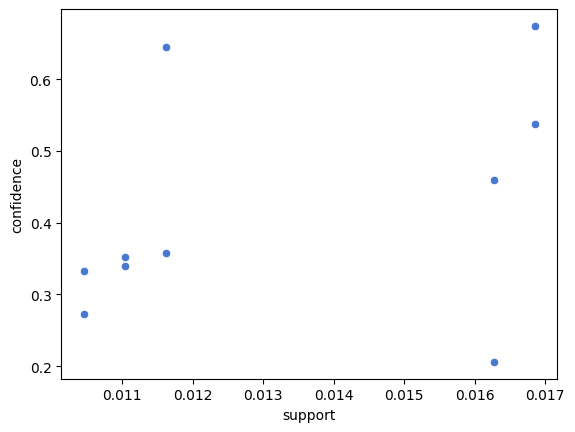

In [ ]:
sns.scatterplot(x = "support", y = "confidence", data = rules)
plt.show()

In [ ]:
#CATEGORY
# Building the model
frq_items2 = apriori(basket_tb2, min_support = 0.01, use_colnames = True)

# Collecting the inferred rules in a dataframe
rules2 = association_rules(frq_items2, metric ="lift", min_threshold = 1)
rules2 = rules2.sort_values(['confidence', 'lift'], ascending =[False, False])
#print(rules.head())
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
100,"(bata, pasir)",(semen),0.012202,0.187101,0.011621,0.952381,5.090210,0.009338,17.070889
75,(pasir),(semen),0.058687,0.187101,0.051714,0.881188,4.709704,0.040734,6.841904
106,"(pipa, lem)",(knee),0.015689,0.091807,0.012783,0.814815,8.875293,0.011343,4.904242
116,"(tee, pipa)",(knee),0.013945,0.091807,0.011040,0.791667,8.623154,0.009760,4.359326
9,(bata),(semen),0.044160,0.187101,0.033120,0.750000,4.008540,0.024858,3.251598
...,...,...,...,...,...,...,...,...,...
34,(semen),(keramik),0.187101,0.032539,0.012783,0.068323,2.099712,0.006695,1.038408
101,(semen),"(bata, pasir)",0.187101,0.012202,0.011621,0.062112,5.090210,0.009338,1.053215
36,(semen),(kericak),0.187101,0.016270,0.011040,0.059006,3.626775,0.007996,1.045416
28,(semen),(cat tembok),0.187101,0.047066,0.011040,0.059006,1.253700,0.002234,1.012689


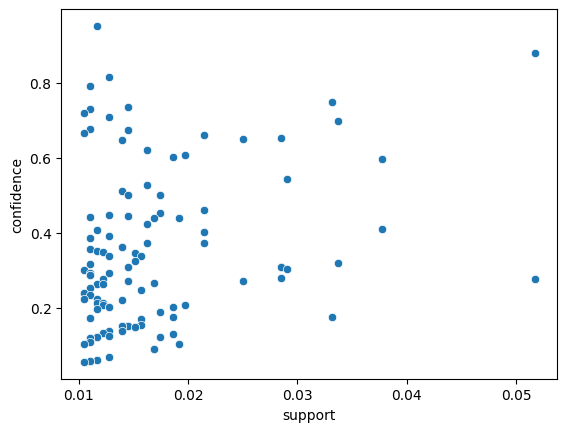

In [ ]:
sns.scatterplot(x = "support", y = "confidence", data = rules2)
plt.show()

Filtered rules

In [ ]:
filtered_rules = rules2[(rules2['confidence'] >= 0.5) &
                        (rules2['lift'] > 1.0)&
                        (rules2['support']>=0.02)]
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
75,(pasir),(semen),0.058687,0.187101,0.051714,0.881188,4.709704,0.040734,6.841904
9,(bata),(semen),0.044160,0.187101,0.033120,0.750000,4.008540,0.024858,3.251598
31,(fisher),(skrup),0.048228,0.105752,0.033701,0.698795,6.607838,0.028601,2.968902
0,(afduner),(cat kayu besi),0.032539,0.053457,0.021499,0.660714,12.359666,0.019760,2.789810
52,(sock),(knee),0.043579,0.091807,0.028472,0.653333,7.116371,0.024471,2.619787
56,(tee),(knee),0.038350,0.091807,0.024985,0.651515,7.096567,0.021465,2.606119
44,(pipa),(knee),0.063335,0.091807,0.037769,0.596330,6.495471,0.031954,2.249842
23,(cat kayu besi),(kuas),0.053457,0.095293,0.029053,0.543478,5.703208,0.023959,1.981738


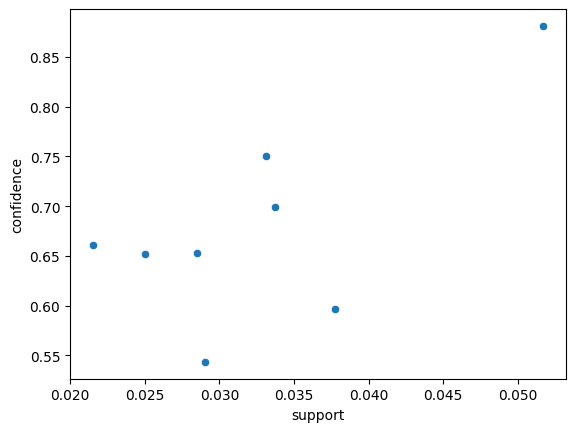

In [ ]:
sns.scatterplot(x = "support", y = "confidence", data = filtered_rules)
plt.show()

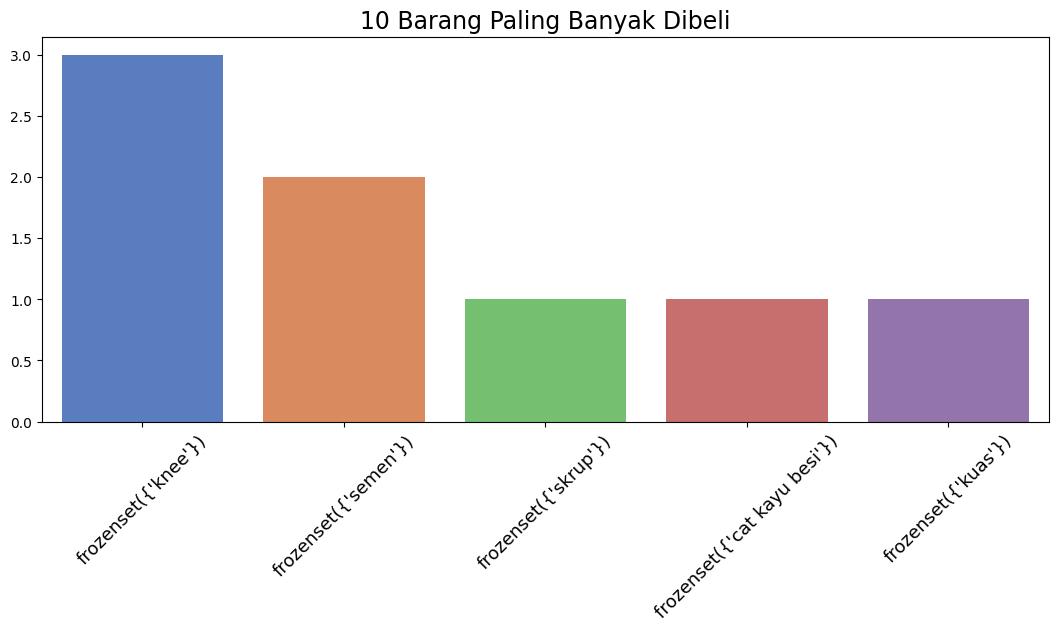

In [ ]:
plt.figure(figsize=(13,5))
sns.set_palette("muted")

# coords = rules_to_coordinates(filtered_rules)
sns.barplot(x = filtered_rules["atecedents" and "consequents"].value_counts()[:10].index, y = filtered_rules["atecedents" and "consequents"].value_counts()[:10].values)
plt.xlabel(""); plt.ylabel("")
plt.xticks(size = 13, rotation = 45)
plt.title('10 Barang Paling Banyak Dibeli', size = 17)
plt.show()

In [ ]:
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent:list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent:list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]

<ipython-input-9-411280391d08>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['antecedent'] = rules['antecedents'].apply(lambda antecedent:list(antecedent)[0])
<ipython-input-9-411280391d08>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['consequent'] = rules['consequents'].apply(lambda consequent:list(consequent)[0])
<ipython-input-9-411280391d08>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

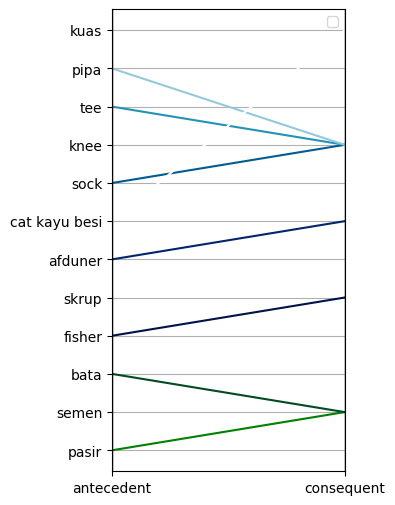

In [ ]:
from pandas.plotting import parallel_coordinates

# Convert rules into coordinates suitable for use in a parallel coordinates plot
coords = rules_to_coordinates(filtered_rules) #filtered_rules
# Generate parallel coordinates plot
plt.figure(figsize=(3,6))
parallel_coordinates(coords, 'rule',colormap = 'ocean')
plt.legend([])
plt.show()